In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.neighbors import DistanceMetric
from load_data import *
from util import *

%matplotlib inline

In [2]:
path = '/media/clo302/3TB_RAID/data/TCGA_embedding/'
ref_path = '/media/clo302/3TB_RAID/ref/TCGA_RNASeq/'

load data

In [3]:
gemb_CN, genes = load_data(path,  ['gemb_CN.csv'], return_rn=True)
gemb_normal = load_data(path, ['gemb_normal.csv'])

(20531, 50)
(20531, 50)


In [4]:
gene2idx = {g:i for i, g in enumerate(genes)}

In [5]:
sid2ca, ca_cats = load_sid2ca(ref_path)

len: 10245


### gemb dist stat

In [6]:
gemb_CN_dist, gemb_CN_dist_mean, gemb_CN_dist_std = get_emb_dist(gemb_CN, index=genes)
gemb_normal_dist, gemb_normal_dist_mean, gemb_normal_dist_std = get_emb_dist(gemb_normal, index=genes)

(20531, 20531) 0.9430543915285435 0.31745227898677725
(20531, 20531) 0.720421394193206 0.2820022162246797


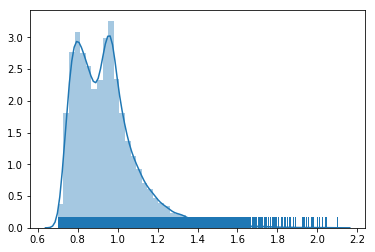

In [7]:
sns.distplot(gemb_CN_dist_mean, rug=True)

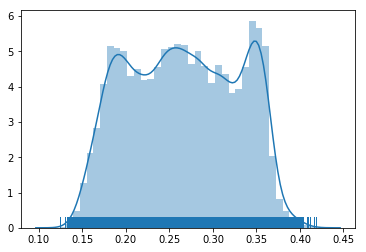

In [8]:
sns.distplot(gemb_CN_dist_std, rug=True)

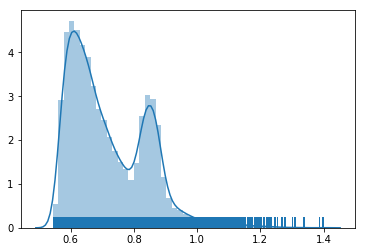

In [9]:
sns.distplot(gemb_normal_dist_mean, rug=True)

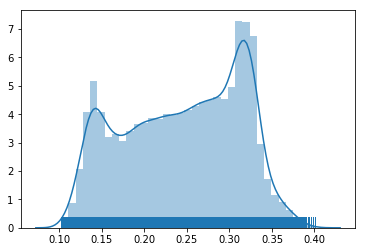

In [10]:
sns.distplot(gemb_normal_dist_std, rug=True)

### pull neighbors for cancer/network hub & io

In [7]:
gemb_CN_dist_masked, _, _ = get_emb_dist(gemb_CN, index=genes, masked=True)
gemb_normal_dist_masked, _, _ = get_emb_dist(gemb_normal, index=genes, masked=True)

shape: (20531, 20531); mean: 5.472; std: 4.534
shape: (20531, 20531); mean: 5.360; std: 4.644


In [8]:
gemb_CN_dist_masked_nbs_mdf = get_close_nbs_mdf(gemb_CN_dist_masked, genes, th=0.6)
gemb_normal_dist_masked_nbs_mdf = get_close_nbs_mdf(gemb_normal_dist_masked, genes, th=0.4)

len: 34052241
len: 27457524


In [10]:
gemb_CN_dist_masked_nbs_mdf.to_csv(path+'gemb_CN_dist_masked_nbs_mdf_th06.csv')
gemb_normal_dist_masked_nbs_mdf.to_csv(path+'gemb_normal_dist_masked_nbs_mdf_th04.csv')